# Trainingdata Sentiwordnet without stopword cleaning

In [1]:
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to create statistics and visualize data
import seaborn as sns 
from sklearn.metrics import * # to calculate the metrics
from nltk.corpus import sentiwordnet as swn # model that is used

setting to show full text content

In [2]:
pd.set_option('display.max_colwidth', None)

## Loading data

In [3]:
df_sentiwordnet_with_stopwords = pd.read_csv('../../Data-Preparation/sentiment140/traindata_with_stopwords_preprocessed.csv')

In [4]:
df_sentiwordnet_with_stopwords['target'].value_counts()

target
0    486400
4    486400
Name: count, dtype: int64

In [5]:
df_sentiwordnet_with_stopwords.head()

,Text,Ground_Truth_Label,target
0,@ddlovato wow Not wise of your fear of the elevators incredible! i love you demi !,negative,0
1,"@rimamelati hahaha! i'm so so bored. what are you doing? haha, the plane crash is so so scary",negative,0
2,"@BrendaSanDiego Sure, i'm following you now",positive,4
3,"@yum9me does your itunes say that you can download OS3 yet, because mine says my OS is up to date",negative,0
4,@PetiteAntoin my mom's French Mauritian and I can't speak French Good luck learning it,negative,0


## Classifying sentiments 

This classifier uses only the most common meaning (lemma) of each word. For example, if the word "dog" appears, it is assumed to refer to the animal rather than being used as an insult. The sentiment score is determined based on this assumption.

In [6]:
def superNaiveSentiment(review):
    reviewPolarity = 0.0
    numExceptions = 0
    words = review.lower().split()
    
    for word in words:
        weight = 0.0
        synsets = list(swn.senti_synsets(word))
        if synsets:
            common_meaning = synsets[0]
            pos_score = common_meaning.pos_score()
            neg_score = common_meaning.neg_score()
            if pos_score > neg_score:
                weight += pos_score
            elif pos_score < neg_score:
                weight -= neg_score
        else:
            numExceptions += 1
        reviewPolarity += weight
    return reviewPolarity


In [7]:
df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'] = df_sentiwordnet_with_stopwords['Text'].apply(lambda x: 'positive' if superNaiveSentiment(x) >= 0 else 'negative')

In [8]:
df_sentiwordnet_with_stopwords.head()

,Text,Ground_Truth_Label,target,Sentiwordnet_Classification
0,@ddlovato wow Not wise of your fear of the elevators incredible! i love you demi !,negative,0,negative
1,"@rimamelati hahaha! i'm so so bored. what are you doing? haha, the plane crash is so so scary",negative,0,negative
2,"@BrendaSanDiego Sure, i'm following you now",positive,4,positive
3,"@yum9me does your itunes say that you can download OS3 yet, because mine says my OS is up to date",negative,0,positive
4,@PetiteAntoin my mom's French Mauritian and I can't speak French Good luck learning it,negative,0,positive


## Testing quality of the classifier on training data

In [9]:
accuracy = accuracy_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.5829266036184211


In [10]:
accuracy = accuracy_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'])
precision = precision_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], pos_label='positive')
recall = recall_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], pos_label='positive')
f1 = f1_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], pos_label='positive')

beta = 1 / (2**0.5)
f_beta = fbeta_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'],beta=beta, pos_label='positive')


In [11]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(f"F-beta Score (beta={beta}): {f_beta}")

Accuracy: 0.58
Precision: 0.56
Recall: 0.83
F1 Score: 0.67
F-beta Score (beta=0.7071067811865475): 0.6244170125699662


In [12]:
print("\nClassification Report:\n")
print(classification_report(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.66      0.34      0.45    486400
    positive       0.56      0.83      0.67    486400

    accuracy                           0.58    972800
   macro avg       0.61      0.58      0.56    972800
weighted avg       0.61      0.58      0.56    972800



creating heatmap to visualize false positives and false negatives

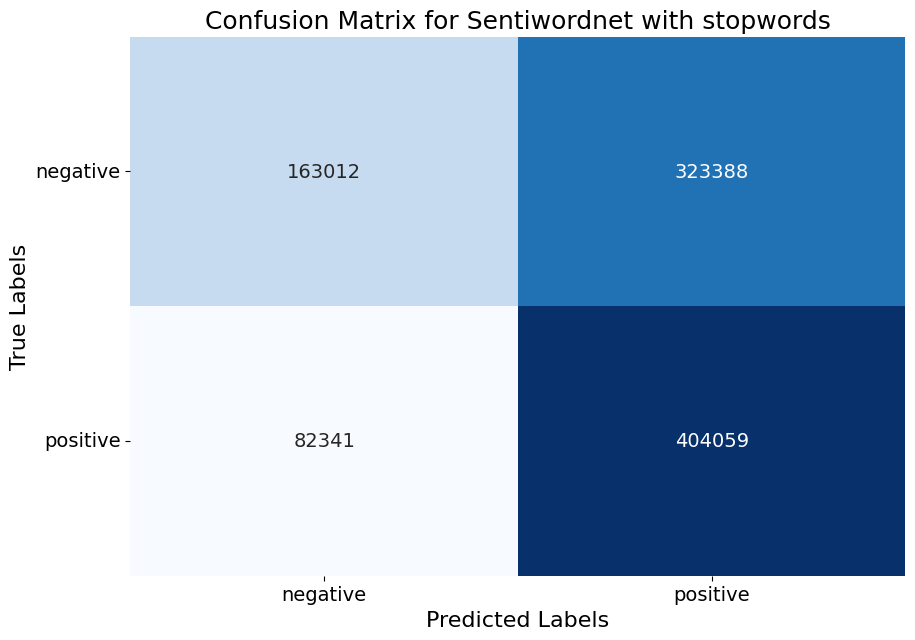

In [13]:
cm_nb = confusion_matrix(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for Sentiwordnet with stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()